<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Part.1/3.Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예제 3-1. 시각화 예시 

### 1) 포틀랜드 월간 대중교통 이용자 수 데이터 시각화

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
pot_tp = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/port_tran_riders.csv")
pot_tp['Month'] = pd.to_datetime(pot_tp['Month'], format='%Y-%m', errors='coerce')
pot_tp = pot_tp.set_index(keys = 'Month')

#### 시각화

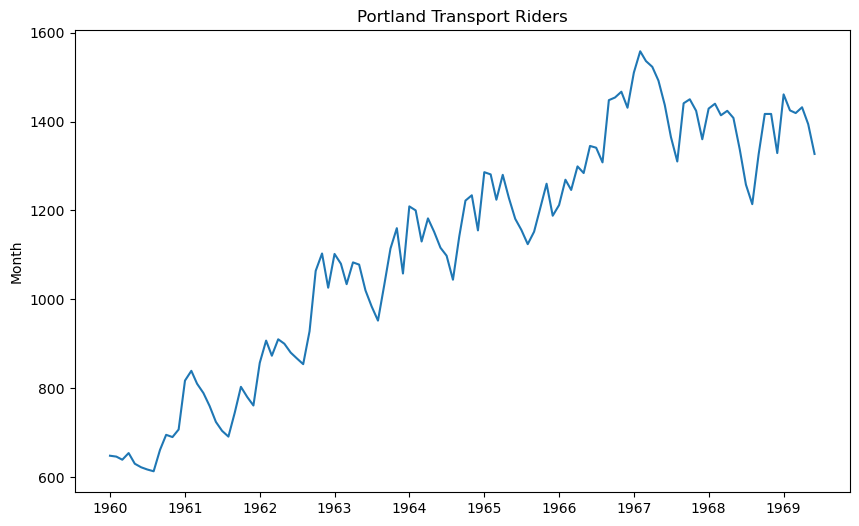

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(pot_tp)
plt.ylabel('Month')
plt.title('Portland Transport Riders')
plt.show()

### 2) 미국 소매업 고용자 수 데이터 시각화

#### 데이터 불러오기

In [4]:
us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/us_employment.csv")

#### 데이터 전처리

In [5]:
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
filtered_data = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

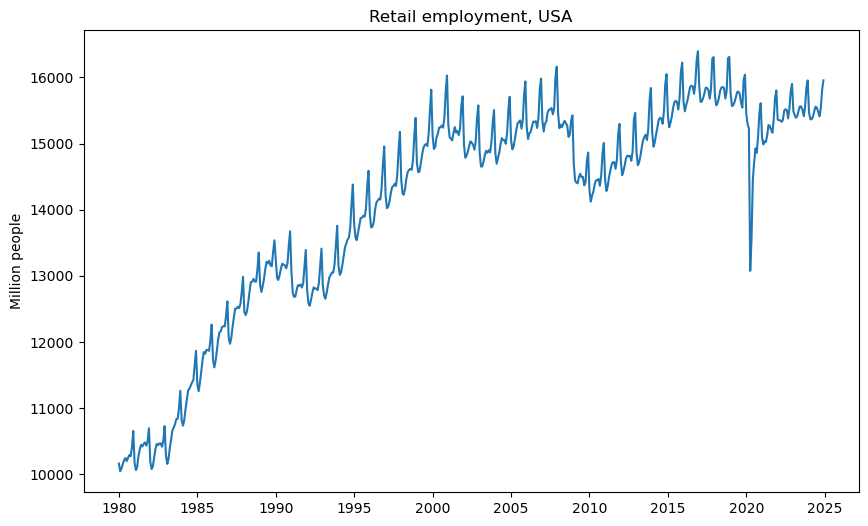

In [6]:
x = filtered_data['Month'].to_numpy()
y = filtered_data['Employed'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('Million people')
plt.title('Retail employment, USA')
plt.show()

### 3) 애플 주가 데이터 시각화

#### 애플(AAPL) 주식 데이터 가져오기

In [33]:
start_date = "2018-01-01"
end_date = "2024-12-31"

stock = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/AAPL_stock.csv", index_col=0)
stock = stock.loc[start_date:end_date]
stock

,close,close_raw,open,high,low,tvol,tamt,sign
date,,,,,,,,
2018-01-02,40.4799,172.26,39.9864,40.4893,39.7749,25555900.0,4.379070e+09,2
2018-01-03,40.4728,172.23,40.5433,41.0180,40.4094,29517900.0,5.155500e+09,5
2018-01-04,40.6608,173.03,40.5457,40.7642,40.4376,22434600.0,3.881270e+09,2
2018-01-05,41.1238,175.00,40.7572,41.2107,40.6655,23660000.0,4.134190e+09,2
2018-01-08,40.9710,174.35,40.9710,41.2671,40.8723,20567800.0,3.591790e+09,5
...,...,...,...,...,...,...,...,...
2024-12-24,257.9170,258.20,255.2100,257.9270,255.0100,23234700.0,5.984850e+09,2
2024-12-26,258.7360,259.02,257.9060,259.8140,257.3470,27263000.0,7.059280e+09,2
2024-12-27,255.3090,255.59,257.5470,258.4160,252.7820,42355300.0,1.081080e+10,5


#### 시각화

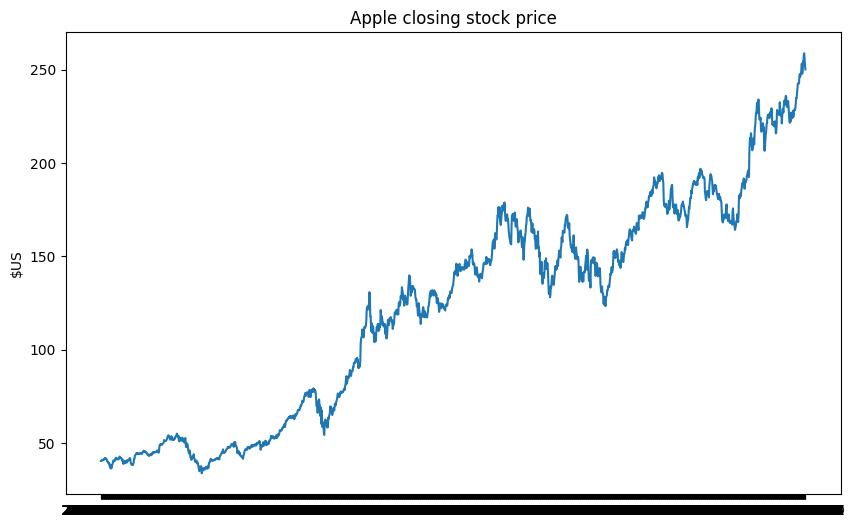

In [34]:
x = stock.index.to_numpy()
y = stock['close'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('$US')
plt.title('Apple closing stock price')
plt.show()

### 5) 스라소니 포획량 데이터 시각화

#### 데이터 불러오기

In [13]:
pelt = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/pelt.csv")

#### 시각화

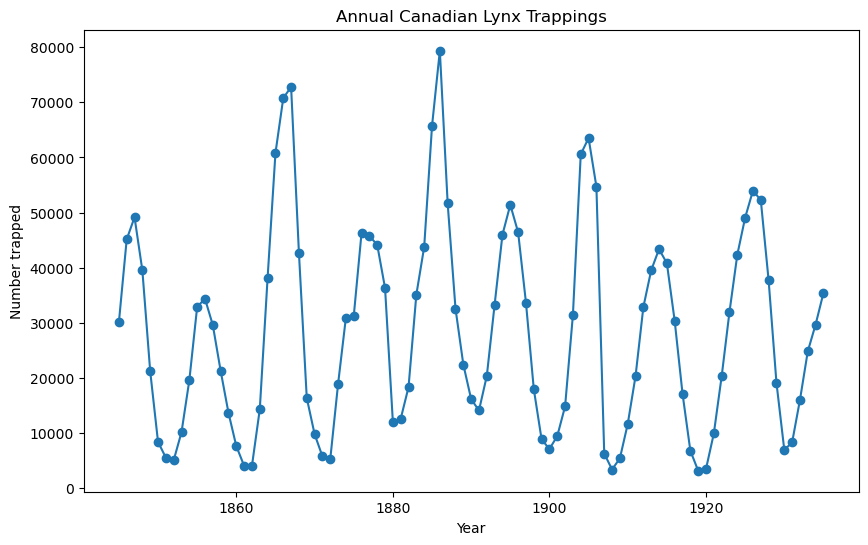

In [14]:
x = pelt['Year'].to_numpy()
y = pelt['Lynx'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title('Annual Canadian Lynx Trappings')
plt.xlabel('Year')
plt.ylabel('Number trapped')
plt.show()

## 예제 3-2. 다중 계절성 그래프 예시

### 1) 빅토리아 전력 수요량 다중 계절성 그래프

#### 필요한 패키지 불러오기

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [16]:
vic_elec = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/vic_elec.csv")

#### 데이터 전처리

In [17]:
vic_elec['Time'] = pd.to_datetime(vic_elec['Time'])

#### 시각화

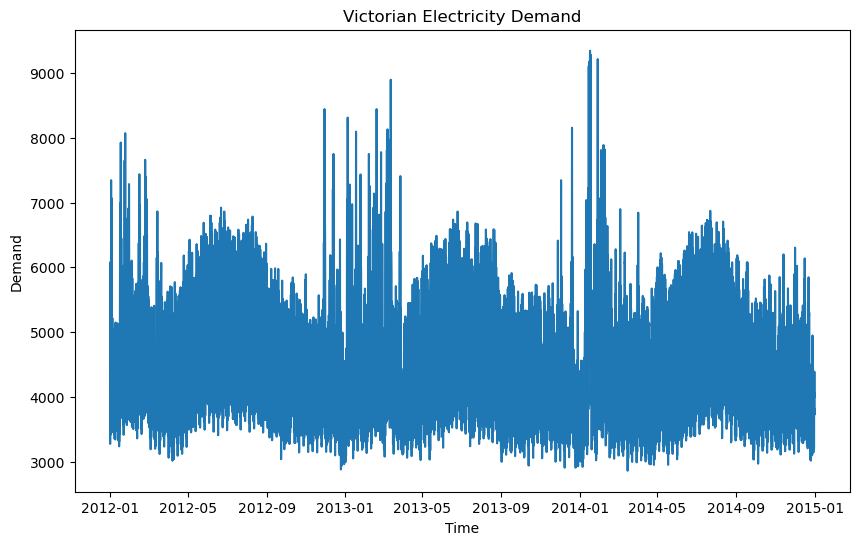

In [18]:
x = vic_elec['Time'].to_numpy()
y = vic_elec['Demand'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Victorian Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

### 2) 빅토리아 연간 전력 수요량 다중 계절성 그래프

#### 필요한 패키지 불러오기

In [19]:
import matplotlib.dates as mdates

#### 데이터 전처리

In [20]:
vic_elec['Year'] = vic_elec['Time'].dt.year
vic_elec['Normalized_Time'] = vic_elec['Time'].apply(lambda dt: dt.replace(year=2012))

#### 시각화

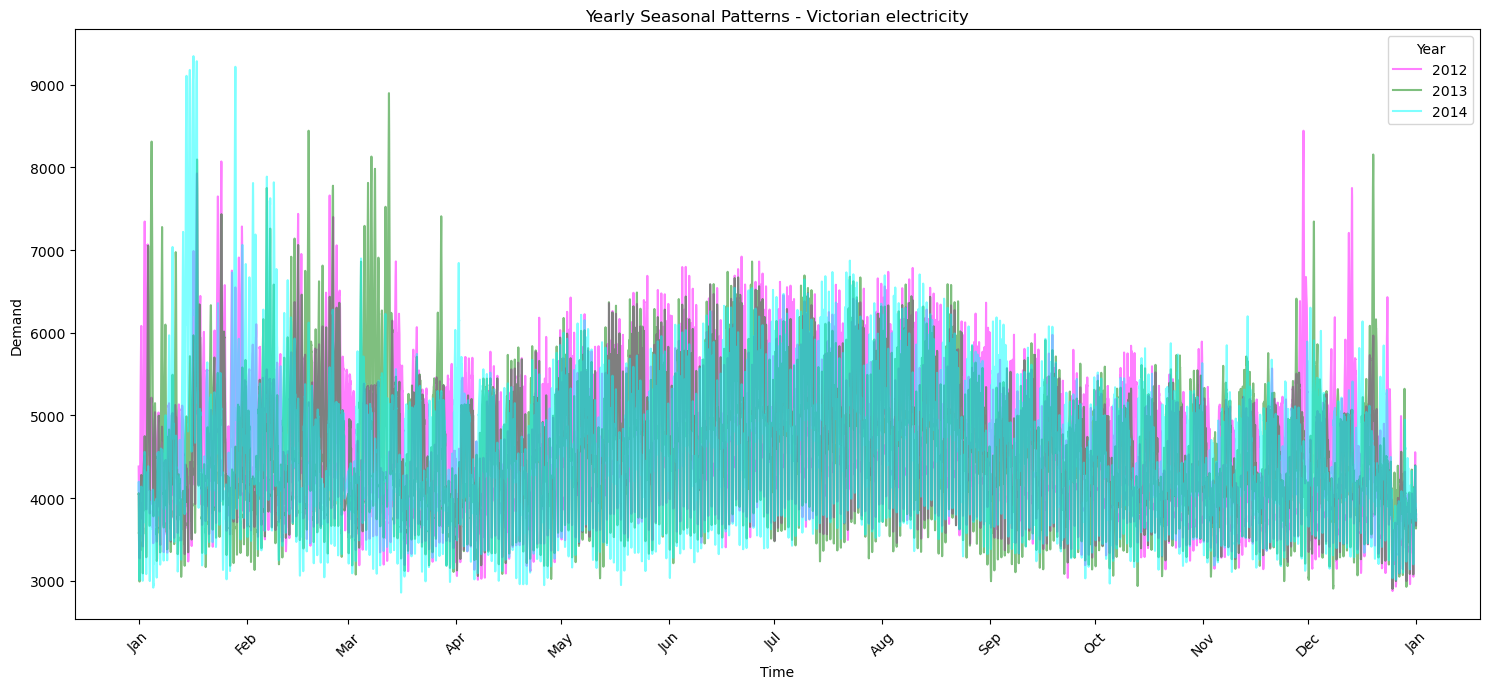

In [21]:
plt.figure(figsize=(15, 7))
colors = {2012: 'magenta', 2013: 'green', 2014: 'cyan'}

for year in sorted(vic_elec['Year'].unique()):
    yearly_data = vic_elec[vic_elec['Year'] == year]
    yearly_data = yearly_data.sort_values(by='Normalized_Time')
    x = yearly_data['Normalized_Time'].to_numpy()
    y = yearly_data['Demand'].to_numpy()
    plt.plot(x, y,
             color=colors[year], alpha=0.5, label=str(year))

plt.title('Yearly Seasonal Patterns - Victorian electricity')
plt.xlabel('Time')
plt.ylabel('Demand')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### 3) 빅토리아 일간 전력 수요량 다중 계절성 그래프

#### 데이터 전처리

In [22]:
vic_elec['Normalized_Date'] = vic_elec['Time'].dt.normalize()
vic_elec['Time_of_day'] = vic_elec['Time'].dt.hour + vic_elec['Time'].dt.minute / 60

#### 시각화

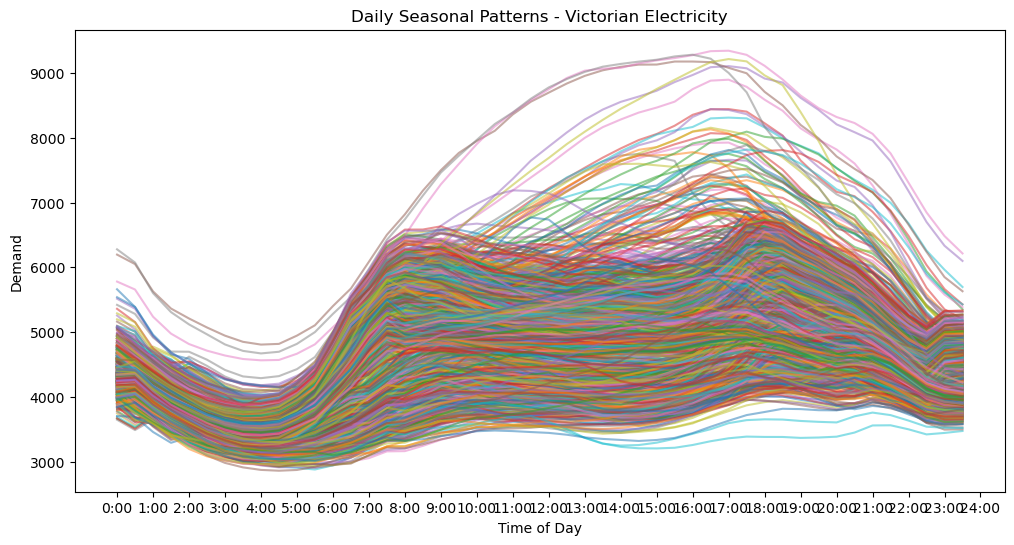

In [23]:
plt.figure(figsize=(12, 6))

daily_groups = vic_elec.groupby(vic_elec['Normalized_Date'])
for name, group in daily_groups:
    x = group['Time_of_day'].to_numpy()
    y = group['Demand'].to_numpy()
    plt.plot(x, y, label=name.strftime('%d/%m/%Y'), alpha=0.5)

plt.title('Daily Seasonal Patterns - Victorian Electricity')
plt.xlabel('Time of Day')
plt.ylabel('Demand')

plt.xticks(range(25), [f'{hour}:00' for hour in range(25)])
plt.show()

## 예제 3-3. 계절별 부분 시계열 그래프 예시

### 대기 이산화탄소 농도의 계절별 부분 시계열 그래프

#### 필요한 패키지 불러오기 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

#### 데이터 불러오기 

In [48]:
co2 = sm.datasets.co2.load_pandas().data

#### 데이터 전처리 

In [49]:
co2 = co2.resample('QE').mean()
co2 = co2.diff()
co2 = co2[co2.index >= '1981-01-01']
co2['Quarter'] = co2.index.quarter
co2['Year'] = co2.index.year
co2

,co2,Quarter,Year
1981-03-31,3.176923,1,1981
1981-06-30,2.223077,2,1981
1981-09-30,-3.992308,3,1981
1981-12-31,-0.284615,4,1981
1982-03-31,3.353846,1,1982
...,...,...,...
2000-12-31,0.042857,4,2000
2001-03-31,3.053846,1,2001
2001-06-30,1.946154,2,2001
2001-09-30,-3.792308,3,2001


#### 시각화 

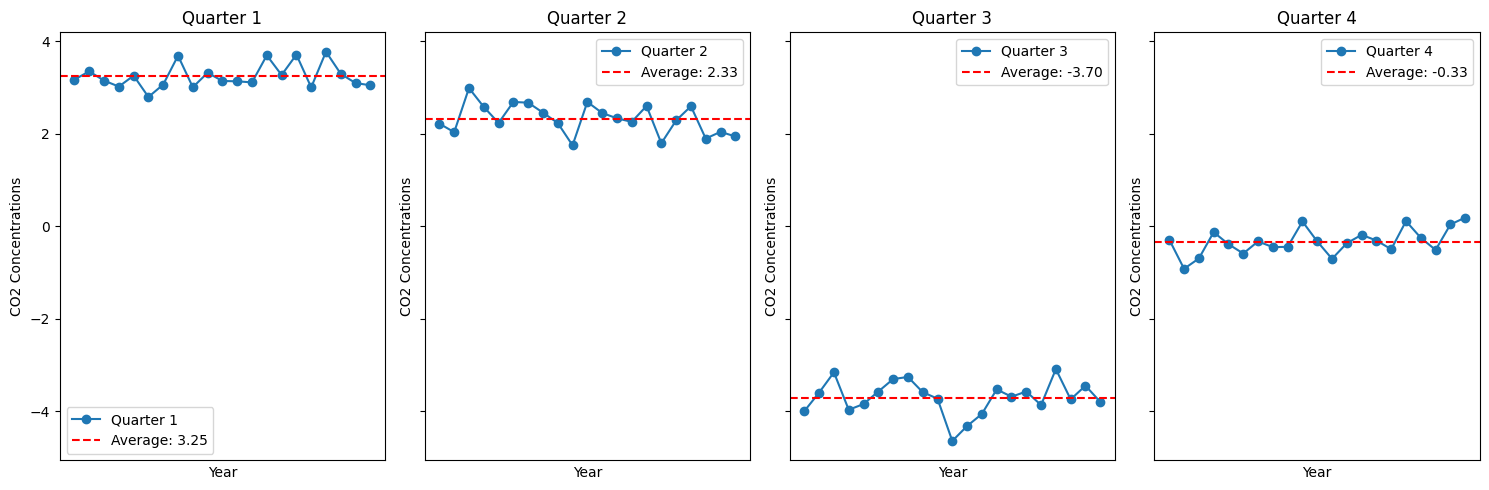

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)  # Adjusted figsize for horizontal layout

for i in range(1, 5):
    ax = axes[i-1]
    quarter_data = co2[co2['Quarter'] == i]
    x = quarter_data['Year'].to_numpy()
    y = quarter_data['co2'].to_numpy()
    ax.plot(x, y, marker='o', label=f'Quarter {i}')
    avg = quarter_data['co2'].mean()
    ax.axhline(y=avg, color='r', linestyle='--', label=f'Average: {avg:.2f}')

    ax.set_title(f'Quarter {i}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Concentrations')
    ax.legend()

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## 예제 3-4. 산점도 예시

### 서울 자전거 대여와 기온 간의 산점도

#### 필요한 패키지 불러오기 

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 불러오기

In [7]:
seoulbike = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/seoulbike.csv")
seoulbike['Date'] = pd.to_datetime(seoulbike['Date'], format='%d/%m/%Y', errors='coerce').dt.strftime('%Y-%m-%d')

#### 데이터 전처리

In [8]:
seoulbike_daily = seoulbike.groupby('Date').agg({
    'Rented Bike Count': lambda x: x.sum() / 1e3,
    'Temperature': 'mean',
    'Holiday': lambda x: (x == 'Holiday').any()
}).reset_index()

seoulbike_daily['Day_Type'] = np.where(
    seoulbike_daily['Holiday'], 'Holiday',
    np.where(pd.to_datetime(seoulbike_daily['Date']).dt.weekday.isin([0, 1, 2, 3, 4]), 'Weekday', 'Weekend')
)
seoulbike_daily['Date'] = pd.to_datetime(seoulbike_daily['Date'])

seoulbike_daily.index = seoulbike_daily['Date'].values
seoulbike_daily = seoulbike_daily[['Rented Bike Count', 'Temperature', 'Day_Type']]
seoulbike_daily

,Rented Bike Count,Temperature,Day_Type
2017-12-01,9.539,-2.454167,Weekday
2017-12-02,8.523,1.325000,Weekend
2017-12-03,7.222,4.875000,Weekend
2017-12-04,8.729,-0.304167,Weekday
2017-12-05,8.307,-4.458333,Weekday
...,...,...,...
2018-11-26,17.162,6.320833,Weekday
2018-11-27,16.282,7.066667,Weekday
2018-11-28,16.524,5.304167,Weekday
2018-11-29,16.423,3.304167,Weekday


#### 시각화

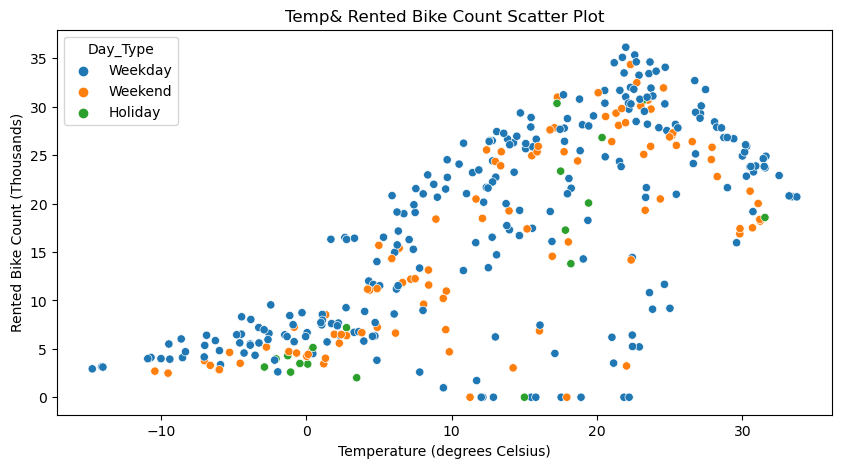

Temperature와 Rented Bike Count 상관계수: 0.6998242263292067


In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=seoulbike_daily, x='Temperature', y='Rented Bike Count', hue='Day_Type')
plt.xlabel('Temperature (degrees Celsius)')
plt.ylabel('Rented Bike Count (Thousands)')
plt.title('Temp& Rented Bike Count Scatter Plot')
plt.show()

correlation = seoulbike_daily['Temperature'].corr(seoulbike_daily['Rented Bike Count'])
print("Temperature와 Rented Bike Count 상관계수:", correlation)

## 예제 3-5. 지연 그래프 예시

### 대기 이산화탄소 농도의 계절별 부분 시계열 그래프

#### 필요한 패키지 불러오기

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.api as sm

#### 데이터 불러오기 

In [55]:
co2 = sm.datasets.co2.load_pandas().data

#### 데이터 전처리 

In [56]:
co2 = co2.resample('QE').mean()
co2 = co2[co2.index >= '1981-01-01']
co2['Quarter'] = co2.index.quarter
co2['Year'] = co2.index.year
co2

,co2,Quarter,Year
1981-03-31,340.269231,1,1981
1981-06-30,342.492308,2,1981
1981-09-30,338.500000,3,1981
1981-12-31,338.215385,4,1981
1982-03-31,341.569231,1,1982
...,...,...,...
2000-12-31,368.200000,4,2000
2001-03-31,371.253846,1,2001
2001-06-30,373.200000,2,2001
2001-09-30,369.407692,3,2001


#### Lag에 따른 시각화

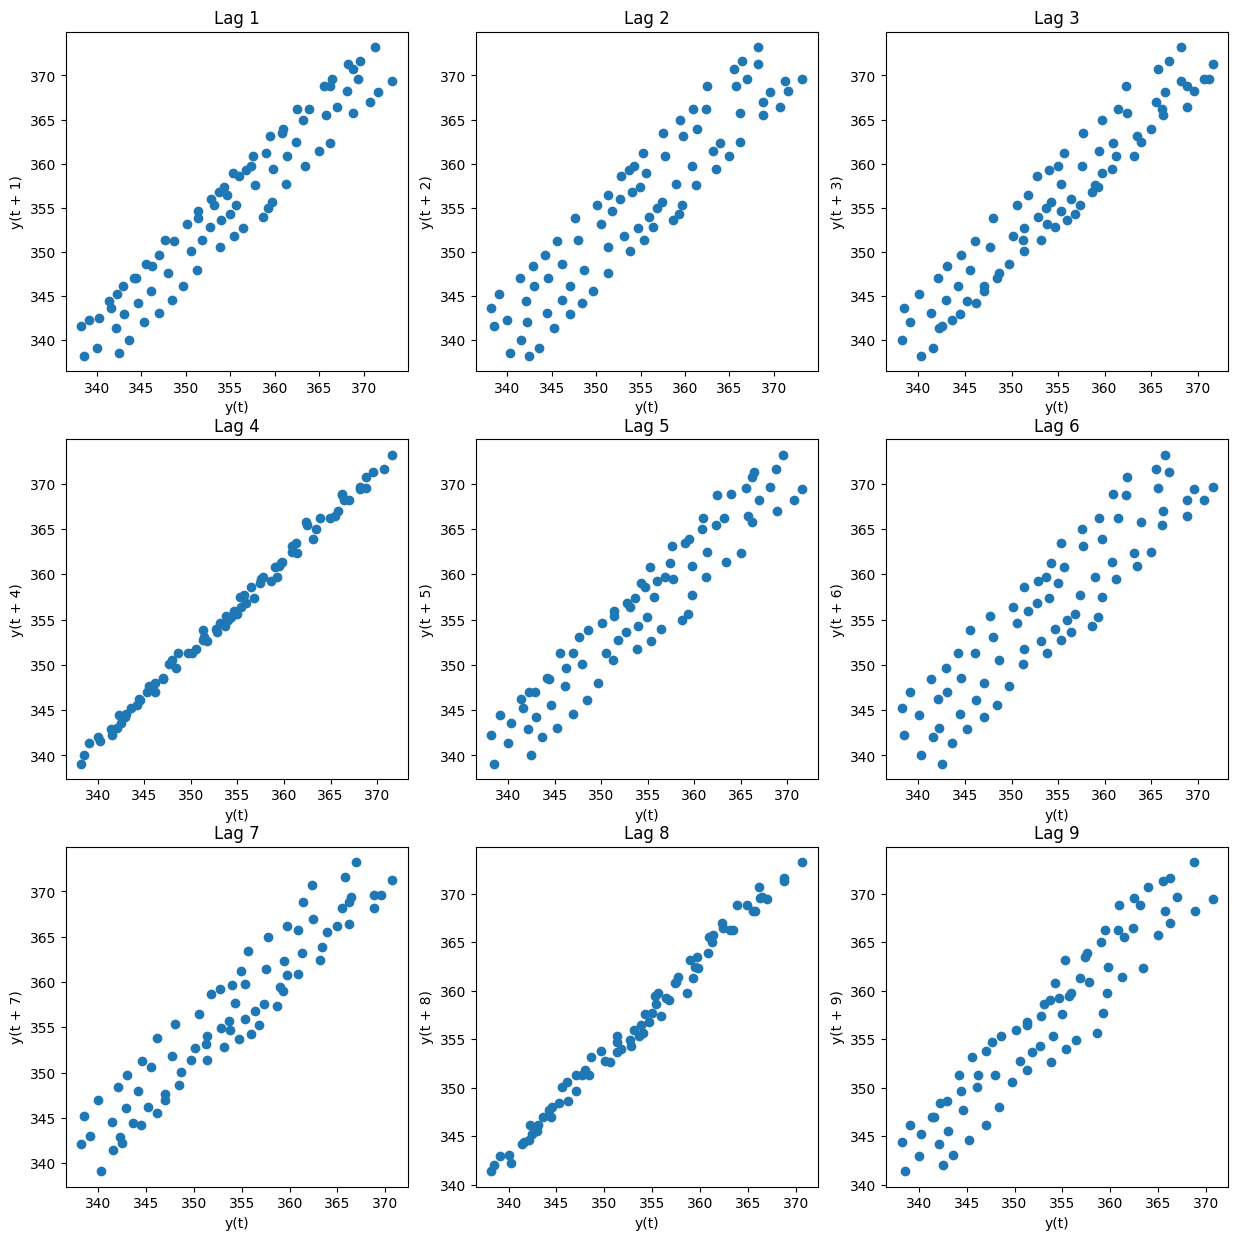

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over different lags
for i, ax in enumerate(axes.flatten(), 1):
    lag_plot(co2['co2'], lag=i, ax=ax)
    ax.set_title(f'Lag {i}')
     
plt.show()

## 예제 3-6. ACF 예시

### 1) 미국 소매업 고용자 수 데이터 ACF

#### 필요한 함수 불러오기

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

#### 데이터 불러오기

In [ ]:
us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/us_employment.csv")

#### 데이터 전처리

In [38]:
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
retail = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

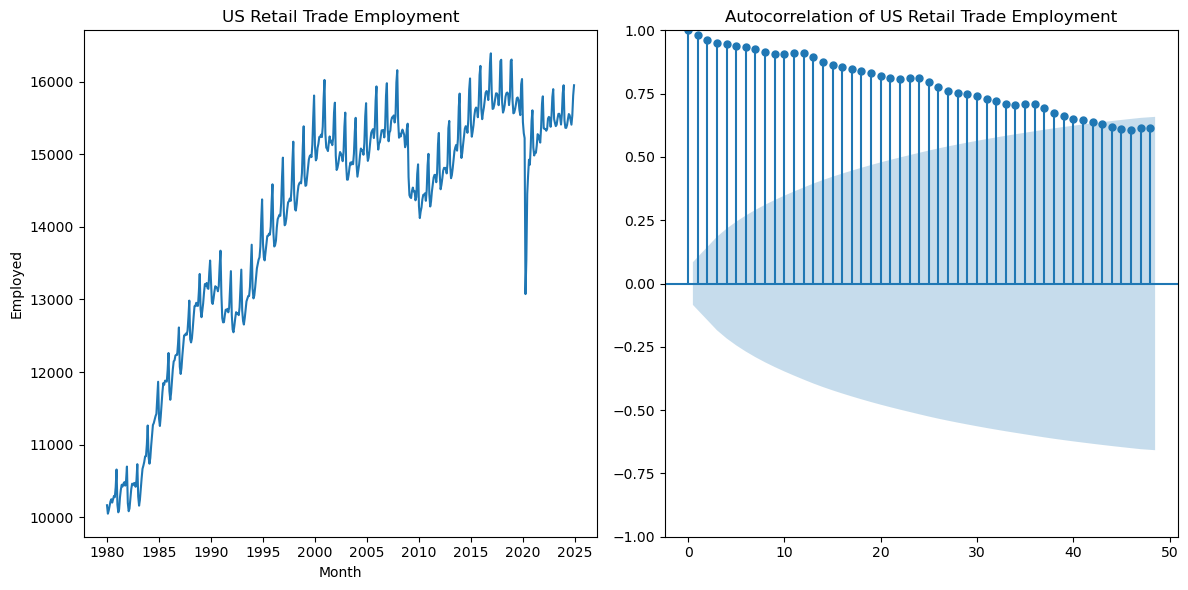

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = retail['Month'].to_numpy()
y = retail['Employed'].to_numpy()

ax1.plot(x, y)
ax1.set_title('US Retail Trade Employment')
ax1.set_xlabel('Month')
ax1.set_ylabel('Employed')

plot_acf(retail['Employed'], lags=48, ax=ax2)
ax2.set_title('Autocorrelation of US Retail Trade Employment')

plt.tight_layout()
plt.show()

### 2) 마이크로소프트 주가 데이터 ACF

#### 마이크로소프트(MSFT) 주식 데이터 가져오기

In [28]:
start_date = "2018-01-01"
end_date = "2024-12-31"

stock = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/MSFT_stock.csv", index_col=0)
stock = stock.loc[start_date:end_date]
stock

,close,close_raw,open,high,low,tvol,tamt,sign
date,,,,,,,,
2018-01-02,79.4743,85.95,79.6361,79.8071,79.0582,22483800.0,1.931420e+09,2
2018-01-03,79.8441,86.35,79.5713,79.9921,79.4927,26061400.0,2.259590e+09,2
2018-01-04,80.5469,87.11,80.0660,81.0554,80.0475,21912000.0,1.911790e+09,2
2018-01-05,81.5455,88.19,81.0554,81.7489,80.8427,23407100.0,2.062870e+09,2
2018-01-08,81.6287,88.28,81.5547,81.9061,81.0042,22113000.0,1.950690e+09,2
...,...,...,...,...,...,...,...,...
2024-12-24,438.4510,439.33,433.7800,438.7200,433.3210,7164540.0,3.139850e+09,2
2024-12-26,437.2330,438.11,438.2010,440.0580,435.7560,8199930.0,3.657040e+09,5
2024-12-27,429.6680,430.53,433.7300,434.3490,425.4970,18117700.0,7.785480e+09,5


#### 시각화

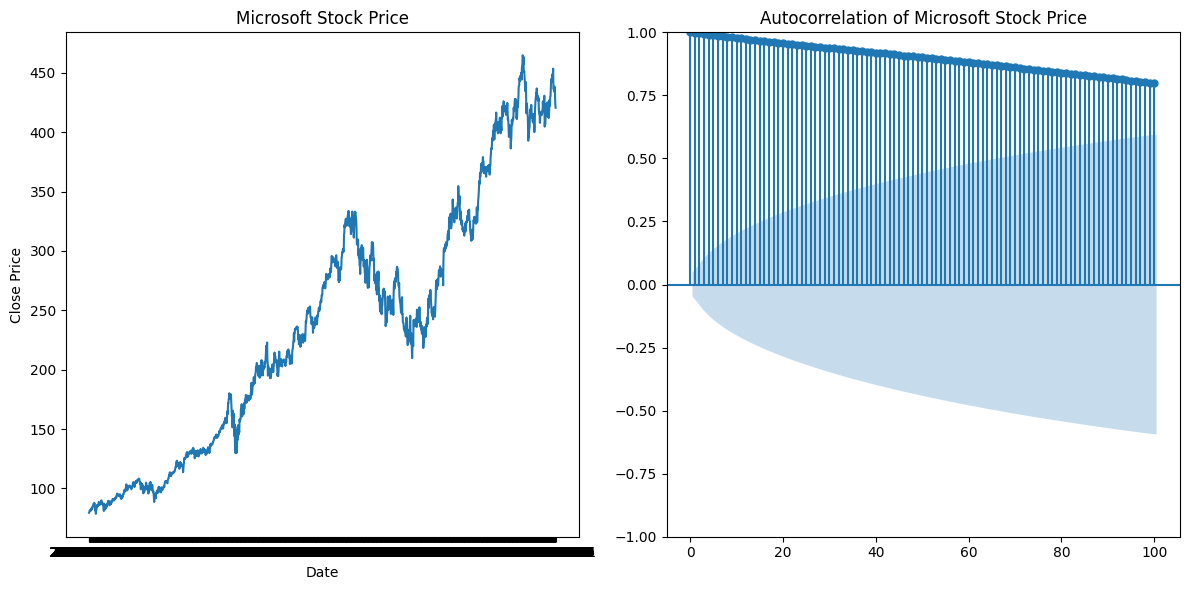

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = stock.index.to_numpy()
y = stock['close'].to_numpy()
ax1.plot(x, y)
ax1.set_title('Microsoft Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')

plot_acf(stock['close'], lags=100, ax=ax2)
ax2.set_title('Autocorrelation of Microsoft Stock Price')

plt.tight_layout()
plt.show()

## 예제 3-7. 백색 잡음 예시

### 태평양 해수면 온도 데이터

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

#### 데이터 불러오기

In [20]:
temp = sm.datasets.elnino.load_pandas().data

#### 데이터 전처리

In [21]:
temp.index = temp.YEAR
temp = temp.drop(columns="YEAR")
temp["avg"] = temp.mean(axis=1)
temp

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,avg
YEAR,,,,,,,,,,,,,
1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,21.953333
1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,23.710833
1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,22.665000
1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44,23.644167
1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30,21.441667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15,23.640833
2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15,22.482500
2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73,23.605000


#### 시각화

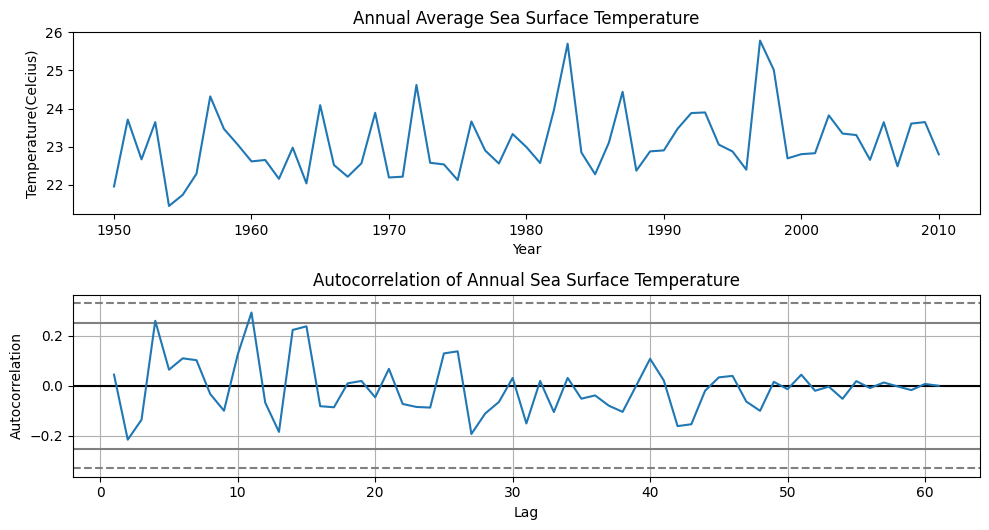

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5.4))

x = temp.index.to_numpy()
y = temp["avg"].to_numpy()

ax1.plot(x, y)
ax1.set_title('Annual Average Sea Surface Temperature')
ax1.set_ylabel('Temperature(Celcius)')
ax1.set_xlabel('Year')

autocorrelation_plot(temp["avg"], ax=ax2)
ax2.set_title('Autocorrelation of Annual Sea Surface Temperature')

plt.tight_layout()
plt.show()